In [1]:
# !pip install autodistill autodistill-grounded-sam autodistill-yolov8 supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.4/82.4 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.0/527.0 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.8/224.8 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 79.0 MB/s eta 0:00:00
  Created wheel for rf-groundingdino: filename=rf_groundingdino-0.1.2-py2.py3-none-any.whl size=88733 sha256=bf515301e435eb6781faf09be6ea64760c9082db92532b3762

In [2]:
import supervision as sv
import cv2

In [39]:
from autodistill_grounded_sam import GroundedSAM
from autodistill.detection import CaptionOntology

base_model = GroundedSAM(ontology=CaptionOntology({"human": "human", "railway track": "railway track"}))

trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


The `device` argument is deprecated and will be removed in v5 of Transformers.
None of the inputs have requires_grad=True. Gradients will be None


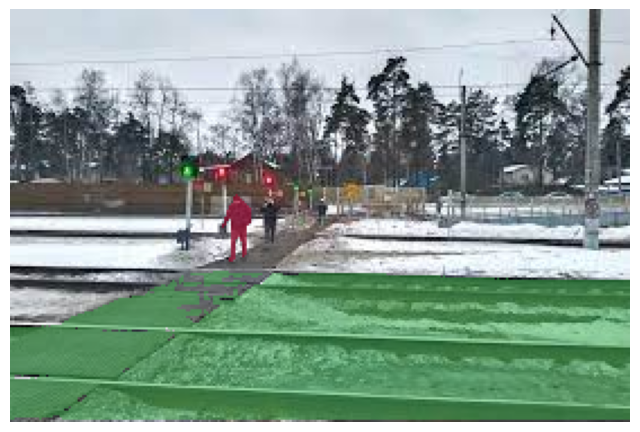

In [40]:
image_name = "/content/images.jpeg"

mask_annotator = sv.MaskAnnotator()

image = cv2.imread(image_name)

classes = base_model.ontology.classes()

detections = base_model.predict(image_name)

labels = [
    f"{classes[class_id]} {confidence:0.2f}"
    for _, _, confidence, class_id, _
    in detections
]

annotated_frame = mask_annotator.annotate(
    scene=image.copy(),
    detections=detections
)

sv.plot_image(annotated_frame, size=(8, 8))

In [7]:
!pip install roboflow

loading Roboflow workspace...
loading Roboflow project...


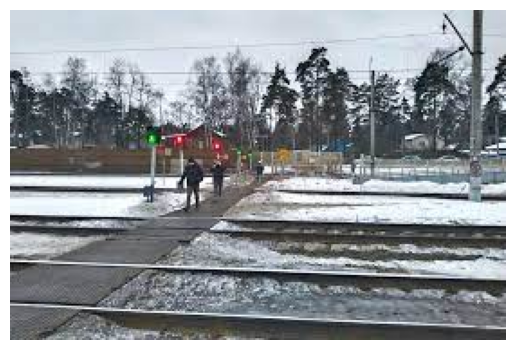

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from roboflow import Roboflow

rf = Roboflow(api_key="m5hbVFqrMoeSTR9p5BQy")
project = rf.workspace().project("vkr-demo")
model = project.version(2).model


def annotate_image(image, predictions):
    for prediction in predictions:
        points = prediction['points']
        label = prediction['class']
        confidence = prediction['confidence']

        # Преобразуем координаты точек в кортежи (x, y)
        point_tuples = [(int(point['x']), int(point['y'])) for point in points]

        # Преобразуем в массив numpy
        points_array = np.array([point_tuples], dtype=np.int32)

        # Рисуем контур объекта
        cv2.polylines(image, [points_array], isClosed=True, color=(0, 255, 0), thickness=2)

        # Добавляем текст с классом и уверенностью
        cv2.putText(image, f'{label} ({confidence:.2f})', point_tuples[0],
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return image

# Путь к изображению
image_path = "/content/images.jpeg"

# Загрузка изображения
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Предсказания модели (предположим, что у вас есть корректные предсказания)
# Пример предсказаний
detections = model.predict(image_path)

# # Используем только ключ 'predictions' из предсказаний
# predictions = detections.get('predictions', [])

# Аннотация изображения
annotated_image = annotate_image(image_rgb.copy(), detections)

# Отображение аннотированного изображения
plt.imshow(annotated_image)
plt.axis('off')
plt.show()
